# Context
- Data include weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# Project Aim

- The main aim of this project is to predict how atmospheric conditions affect the number of bikes rented

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
sns.set()
import warnings
warnings.filterwarnings('ignore')
os.getcwd()


'C:\\Users\\Lenovo\\Desktop\\Juypter\\My practise\\ML\\Capstone\\Todo'

In [2]:
data= pd.read_csv("SeoulBikeData.csv", encoding = "latin1")

In [3]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# Statastical Information

In [5]:
data.describe(include = "all")

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [6]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Converting Date Variable

In [7]:
data["Date"] = pd.to_datetime(data["Date"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [9]:
# Converting date into day month and year for meaningful insights


In [10]:
data["Day"] = data["Date"].dt.day
data["Month"]= data["Date"].dt.month
data["Year"] = data["Date"].dt.year
data["Weekday"]= data["Date"].dt.day_name()

In [11]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Day  Month  Year   Weekday  
0             Yes   12      1  2017  Thursday  
1             Yes   12      1  2017  Thursday  
2             Yes   12      1  2017  Thursday  
3             Yes   12      1  2017  Thursday  
4             Yes   12      1  2017  Thursday

# Dropping Date Column

In [12]:
data.drop("Date",axis= 1, inplace = True)

# Checking for duplicate values

In [13]:
data.duplicated().any()

False

# Data actionables
- Date dtypes need to be converted in datetime format - done
- encoding requrired for Season, Holiday and Functioning day
- Outlier may be present

# Exploratory Data Analysis

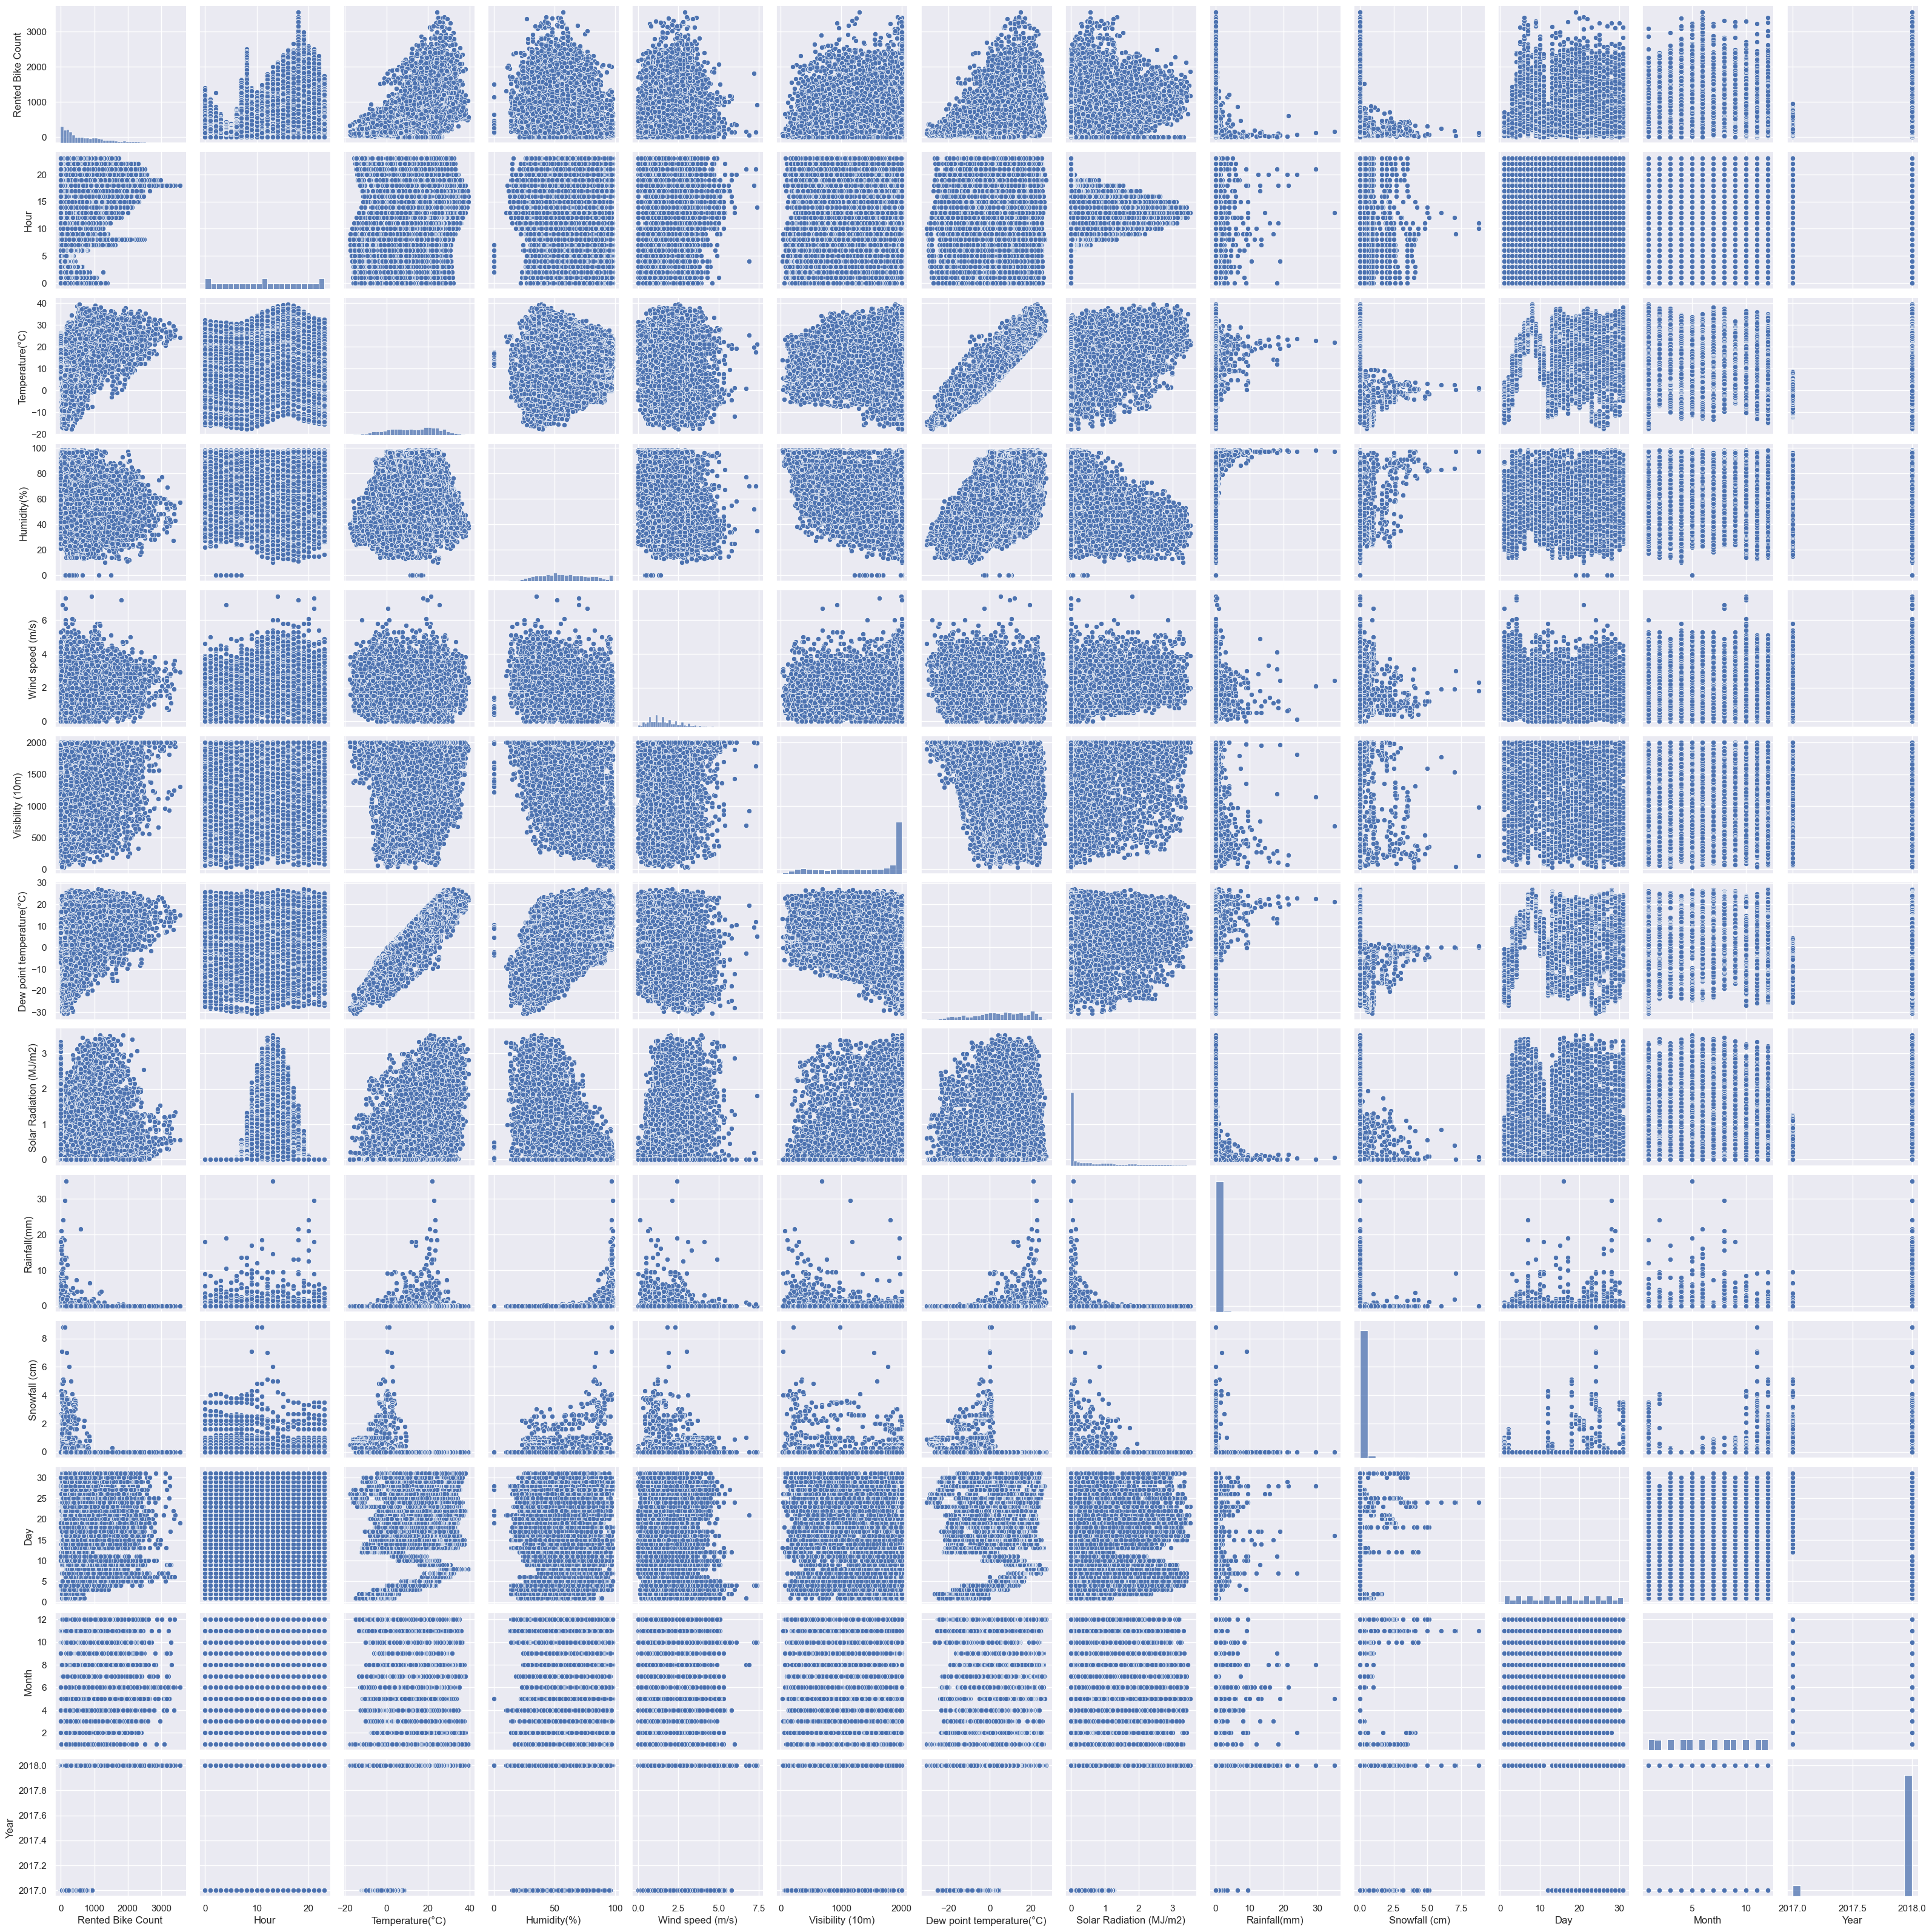

In [14]:
sns.pairplot(data)

Insights:
    
- raifall and snowfall seems highly correlated
- sales have shown a rise
- intial days 1st to 5th the bike demand is low so that time can be used for servicing - suggestion to client
- hours when bike is in high demand the price of the bike can be increased - Morning 9 demand is high and around 7
- 

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

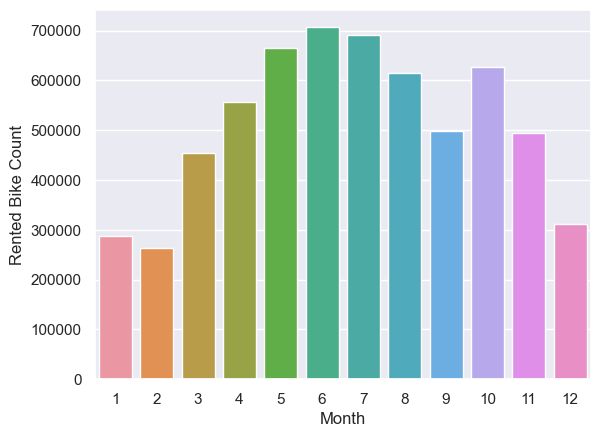

In [15]:
month = data.groupby("Month").sum().reset_index()
sns.barplot(x="Month",y ="Rented Bike Count",data=month)

-  Rent of the bike is peak in month of 5 6 7. jan and feb and low in sales so promotional offer can be relased. bikes servicing purchasing etc can be done here. As it is not a peak season so there may be offers and good deals available from bike stores


<AxesSubplot:xlabel='Day', ylabel='Rented Bike Count'>

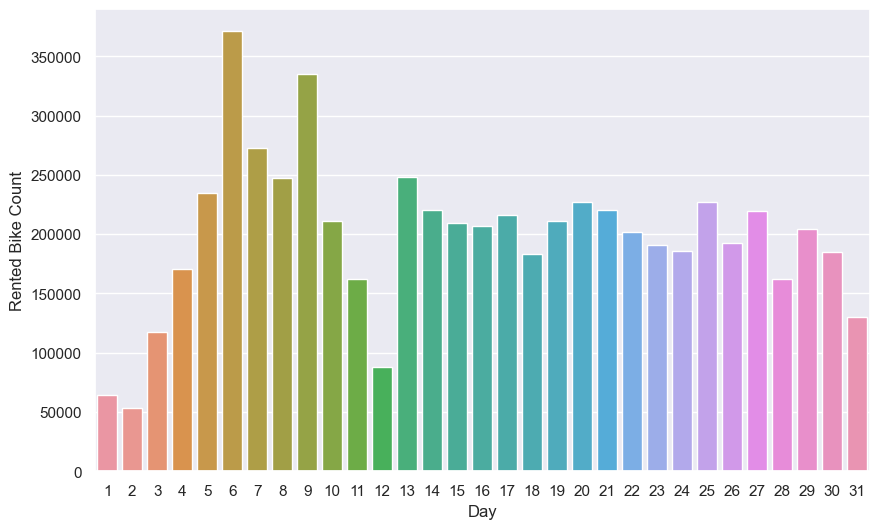

In [16]:
plt.figure(figsize=(10,6))
Day = data.groupby("Day").sum().reset_index()
sns.barplot(x="Day",y ="Rented Bike Count",data=Day)

- Bike demand is less on 1st 2nd and 12th day, high demand on 5 and 9 day

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

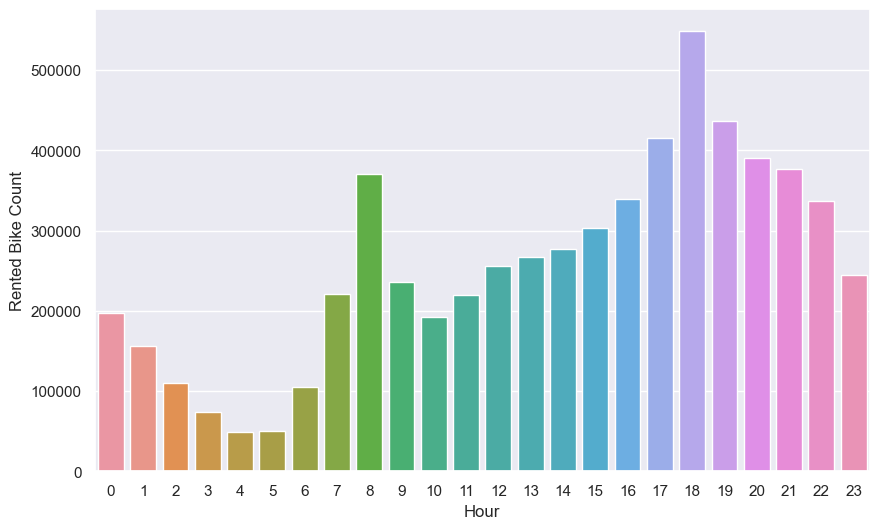

In [17]:
plt.figure(figsize=(10,6))
Hours = data.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour",y ="Rented Bike Count",data=Hours)

- High demand around 8 & 17,18, 19

In [18]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'Weekday'],
      dtype='object')

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

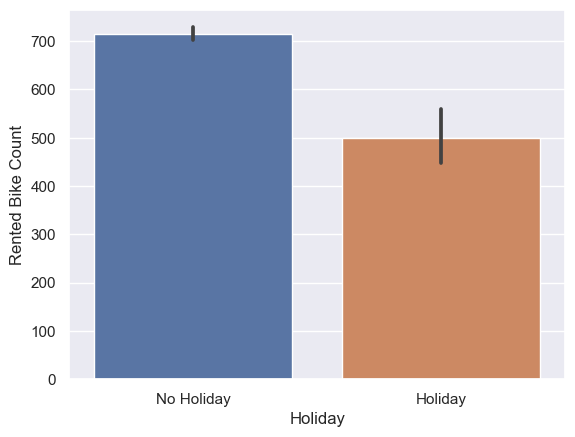

In [19]:
sns.barplot(x= "Holiday", y="Rented Bike Count", data= data)

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

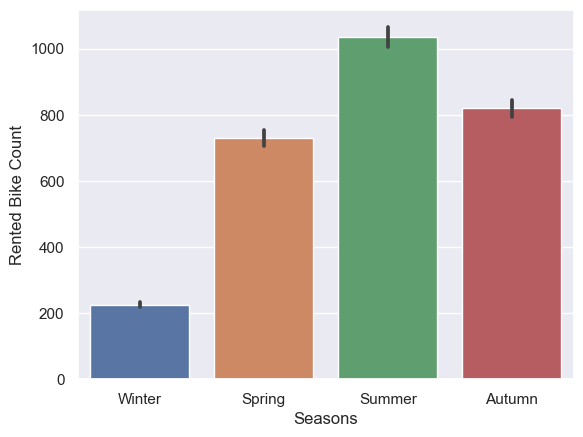

In [20]:
sns.barplot(x= "Seasons", y="Rented Bike Count", data= data)

In [21]:
# Mostly bikes are rented when there is no holiday
#  Mostly bikes are rented in spring and Summer season


<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

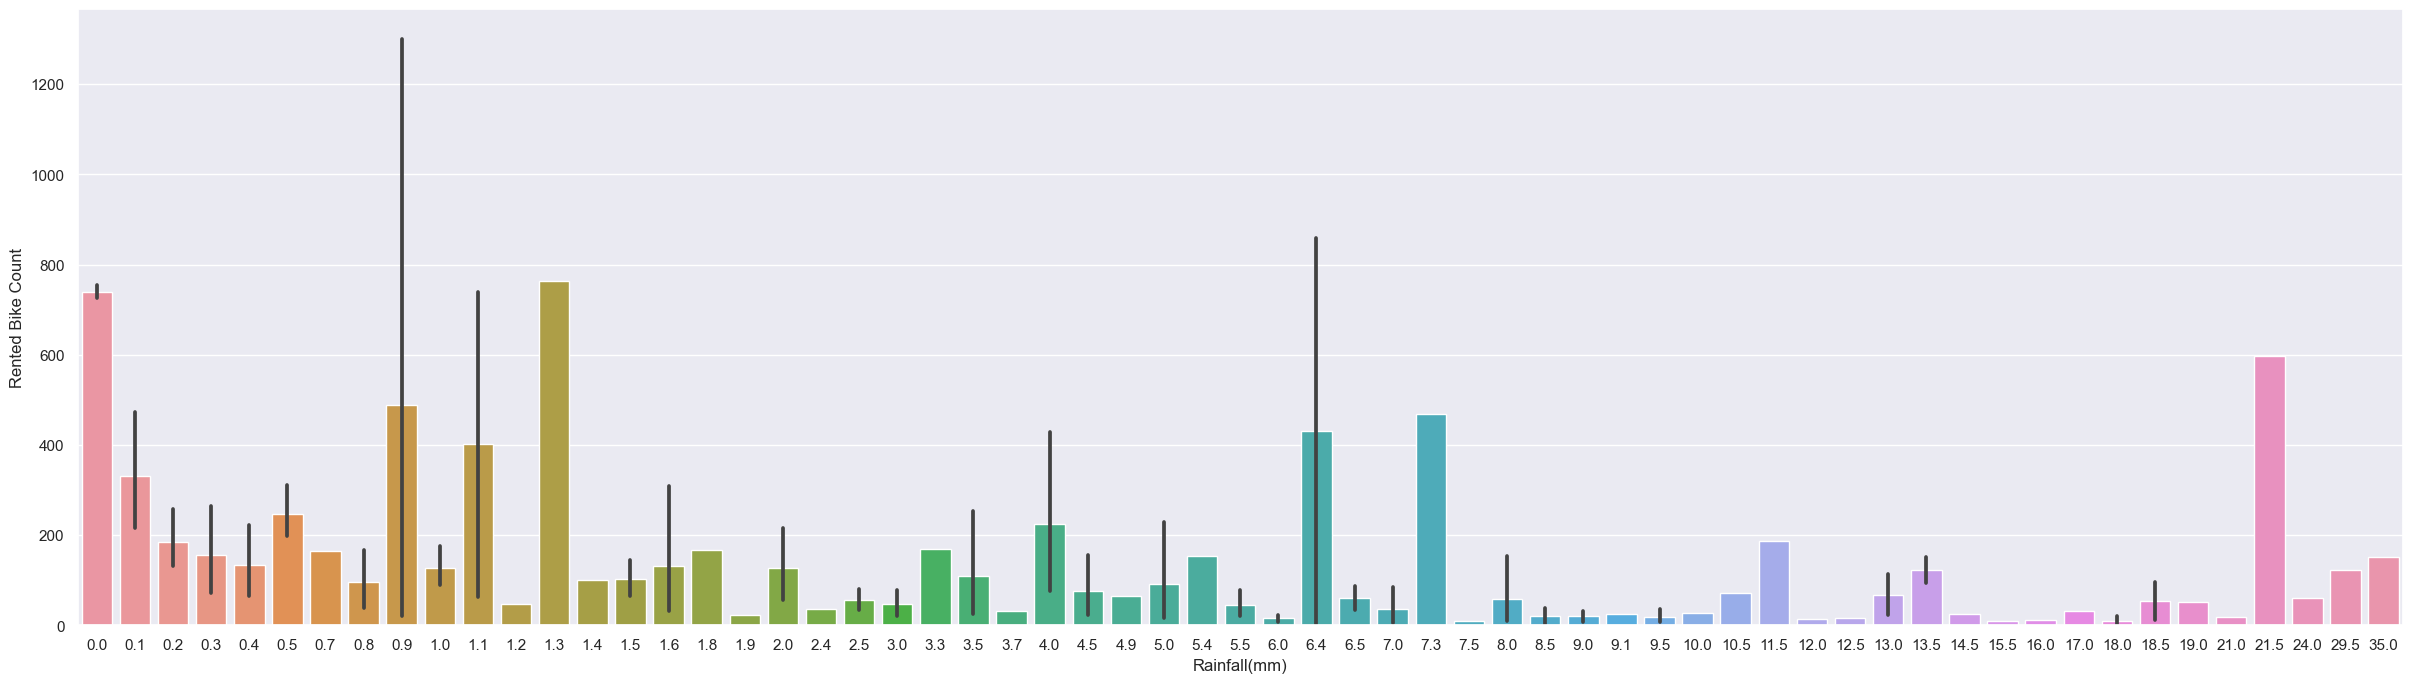

In [22]:
plt.figure(figsize=(30,8))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data= data)

<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

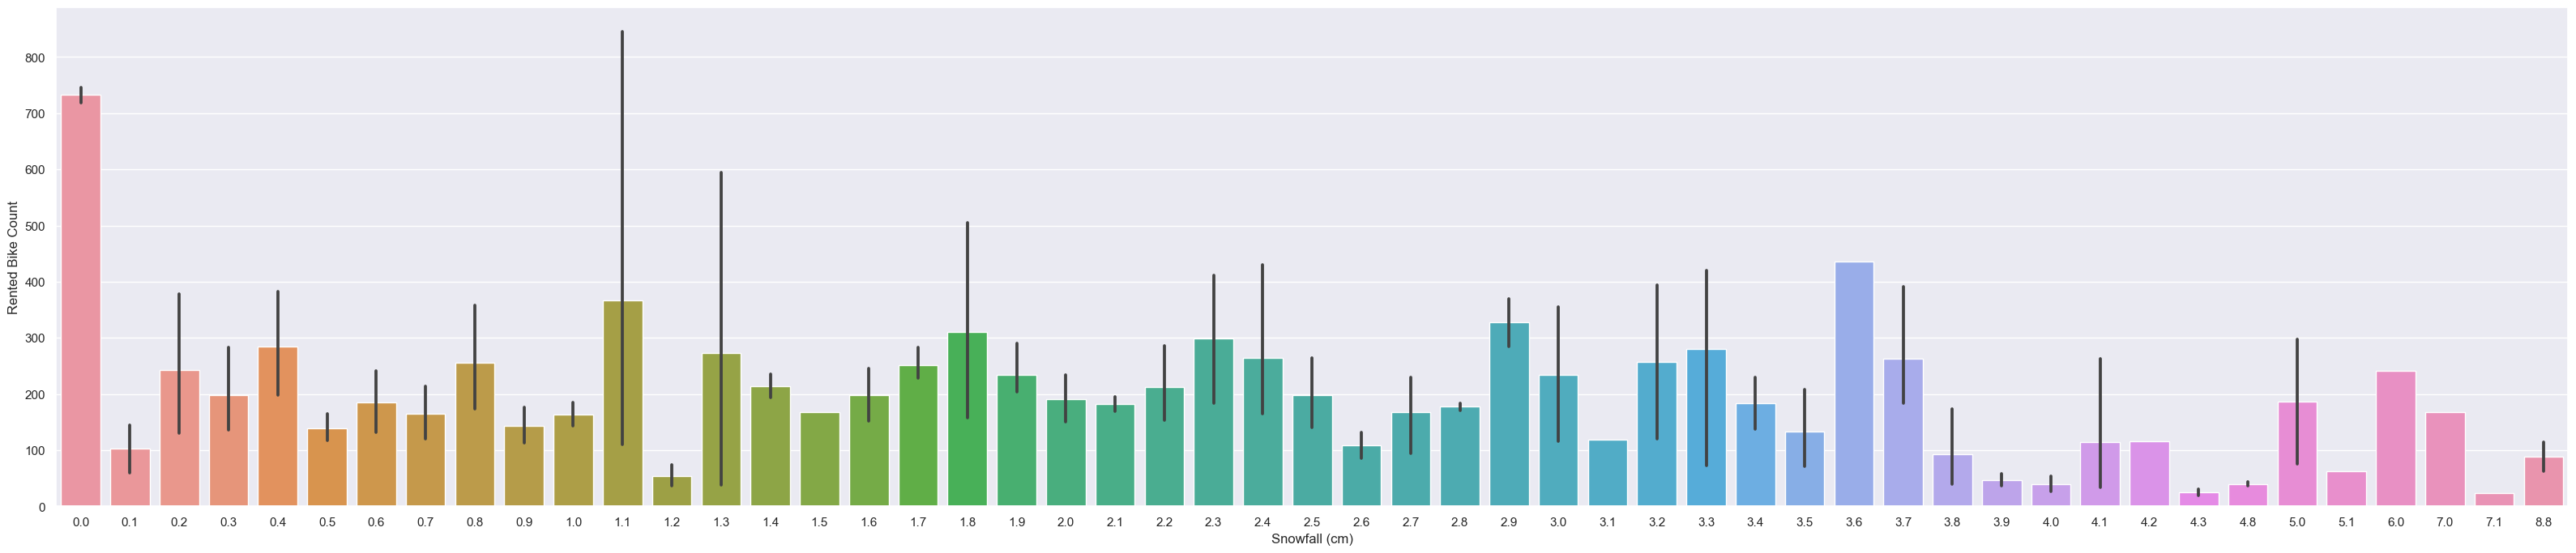

In [23]:
plt.figure(figsize=(40,8))
sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data= data)


<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

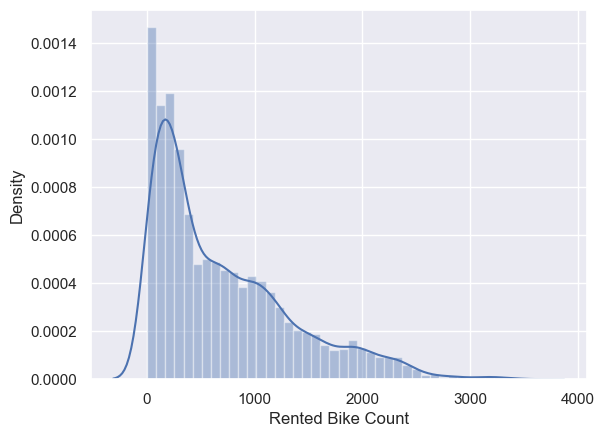

In [24]:
sns.distplot(data["Rented Bike Count"])

<AxesSubplot:ylabel='Density'>

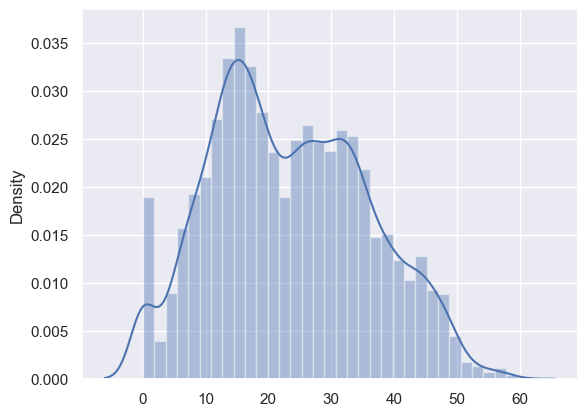

In [25]:
sns.distplot(np.sqrt([data["Rented Bike Count"]]))

# Skewed Data

In [26]:
data.skew().sort_values(ascending = True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

- rainfall and snowfall are highly skewed data - will check at later stage if log transformation is required

# Checking for outliers

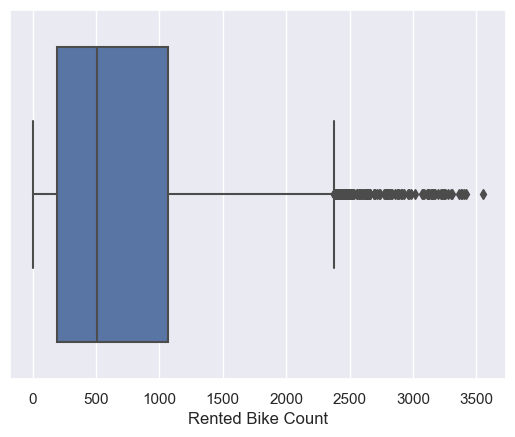

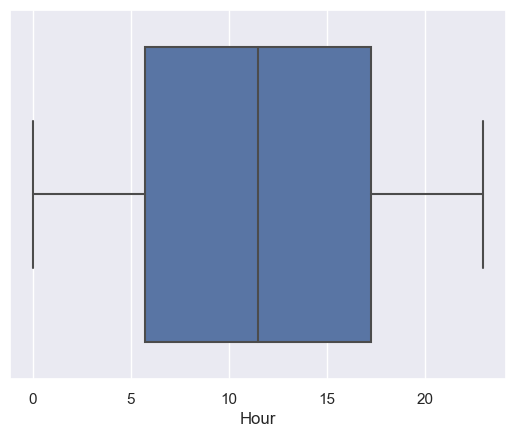

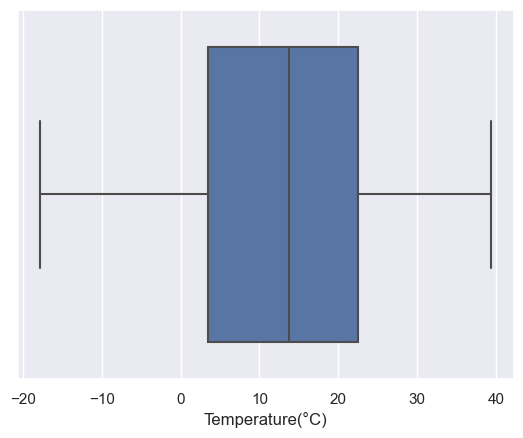

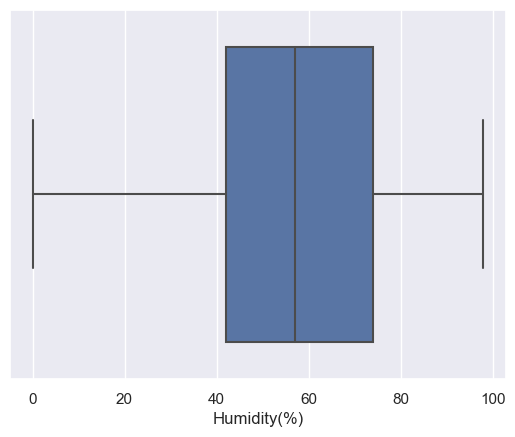

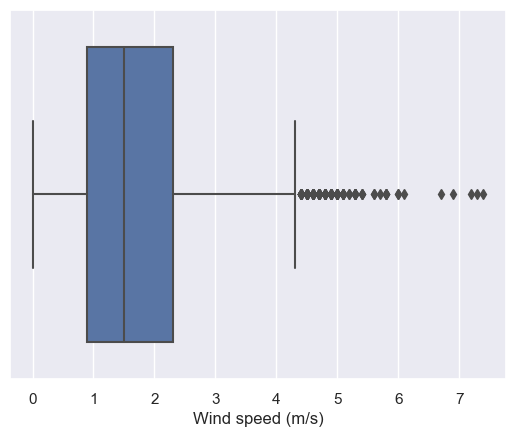

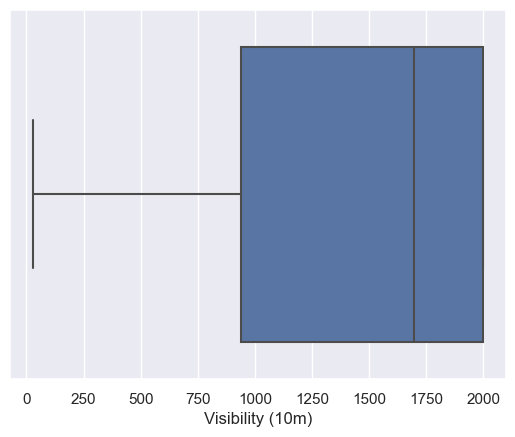

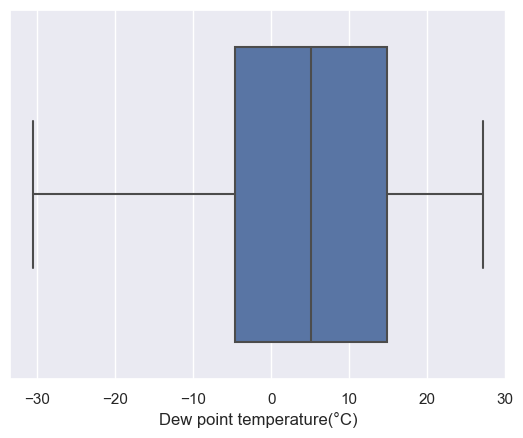

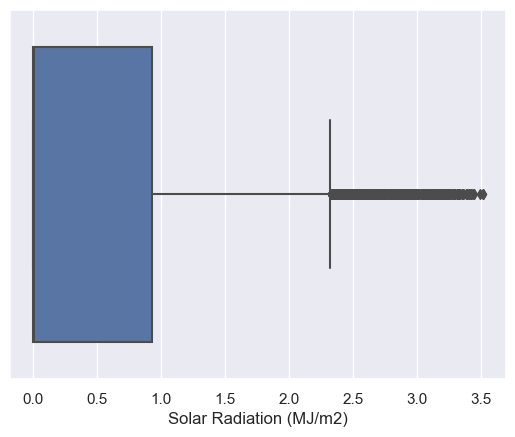

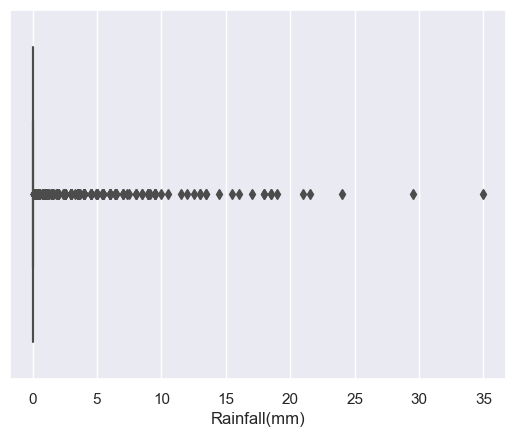

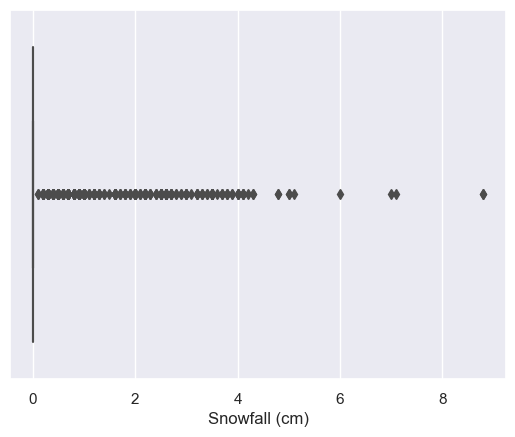

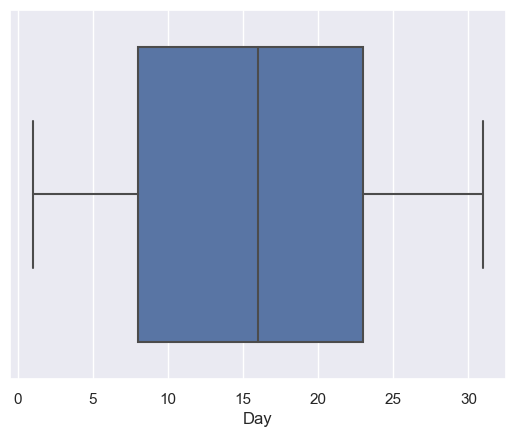

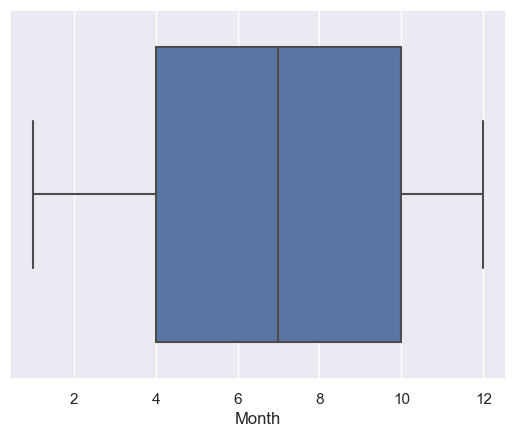

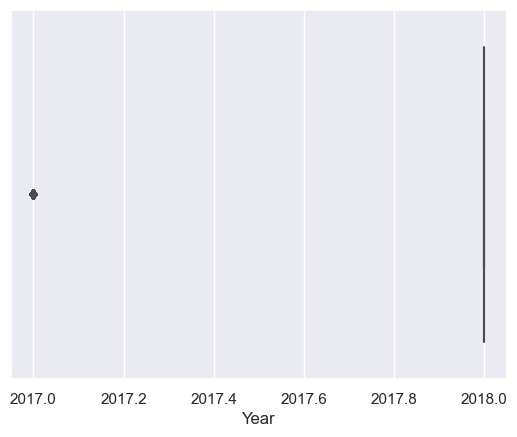

In [27]:
def boxplot(col):
    sns.boxplot(data[col])
    plt.show()
for i in list(data.select_dtypes(exclude= ["object"]).columns)[0:]:
    boxplot(i)

- No outliers at the property. The rainfall snowfall, solar raditon wind speed showing outliers are not outliers as all their highest and lowest value  fall within the creteria

# Checking Correlation/multicollinerity

<AxesSubplot:>

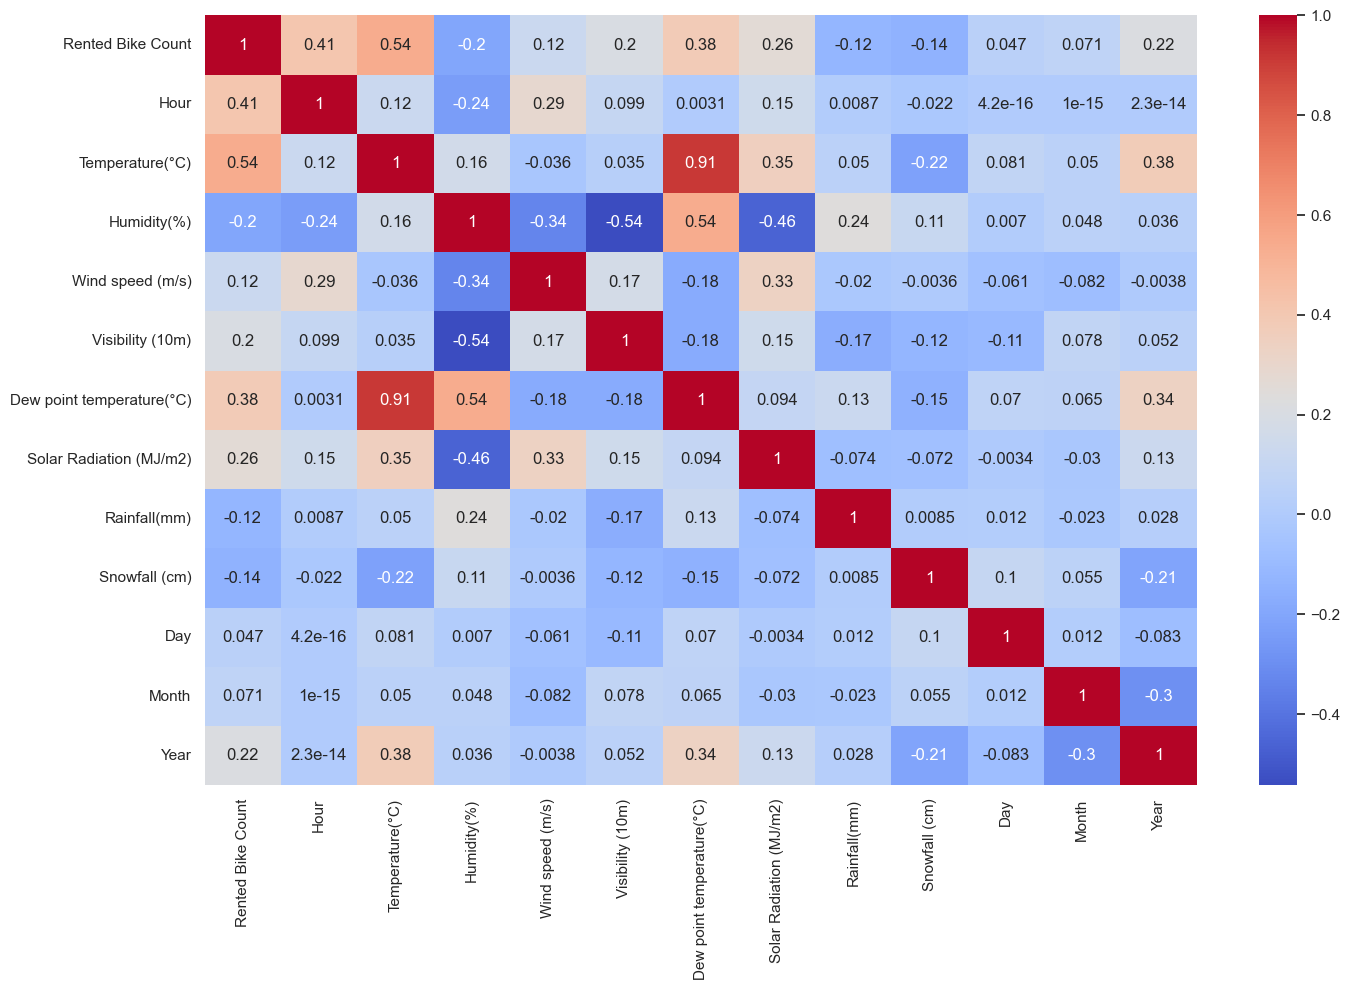

In [28]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),annot= True, cmap = "coolwarm")

In [29]:
# Dew point temp has strong co relation with temperature so we will remove dew point as its correlation is not strong with target variable

# VIF

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
def get_vif(data):
    vif = pd.DataFrame()
    vif["variables"]= data.columns
    vif["VIF"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif

In [32]:
not_for_vif = ["Day","Month","Year","Rented Bike Count"]

In [33]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'Weekday'],
      dtype='object')

In [34]:
get_vif(data[[i for i in data.describe().columns if i not in not_for_vif]])

variables        VIF
0                       Hour   4.418242
1            Temperature(°C)  33.385256
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
4           Visibility (10m)   9.085977
5  Dew point temperature(°C)  17.126199
6    Solar Radiation (MJ/m2)   2.881590
7               Rainfall(mm)   1.081567
8              Snowfall (cm)   1.120833

In [35]:
not_for_vif = ["Day","Month","Year","Rented Bike Count",'Dew point temperature(°C)']

get_vif(data[[i for i in data.describe().columns if i not in not_for_vif]])

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

In [36]:
# We are going to remove Due point temperature this will reduce multicollinerity with temp and other varibables too.

# Drop Dew point temperature(°C) 

In [37]:
data.drop("Dew point temperature(°C)", axis = 1, inplace = True)

# Encoding

In [38]:
categorical=[]
Numerical =[]

for column in data.columns:
    if data[column].nunique() <= 10:
        categorical.append(column)
        
    else:
        Numerical.append(column)

In [39]:
categorical

['Seasons', 'Holiday', 'Functioning Day', 'Year', 'Weekday']

In [40]:
data["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [41]:
data["Holiday"]=data["Holiday"].replace({"No Holiday":0,"Holiday":1})

In [42]:
data["Holiday"].value_counts()

0    8328
1     432
Name: Holiday, dtype: int64

In [43]:
data["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [44]:
data["Functioning Day"] = data["Functioning Day"].replace({"Yes":0,"No":1})

In [45]:
data["Functioning Day"].value_counts()

0    8465
1     295
Name: Functioning Day, dtype: int64

In [46]:
data["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

# One Hot Encoding

In [47]:
data_seasons = pd.get_dummies(data["Seasons"], drop_first= True)

In [48]:
data["Weekday"].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: Weekday, dtype: int64

In [49]:
data_weekday= pd.get_dummies(data["Weekday"], drop_first= True)

In [50]:
data = pd.concat([data,data_seasons,data_weekday],axis= 1)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Day                      8760 non-null   int64  
 13  Month                    8760 non-null   int64  
 14  Year                    

In [52]:
data.drop(["Seasons","Weekday"], axis = 1, inplace = True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  Spring                  

In [54]:
data.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  ...  Year  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0        0  ...  2017       0       0       1       0         0       0   
1        0  ...  2017       0       0       1       0         0       0   
2        0  ...  2017       0       0       1       0         0       0   
3        0  ...  2017       0       0       1       0         0       0   
4        0  ...  2017       0       0       1       0         0       0   

   Thursday  Tuesday  Wednesday  
0         1        0          0  
1         1        0          0  
2         1        0          0  
3         1        0          0  
4         1        0          0  

[5 rows x 23 columns]

In [55]:
data.shape

(8760, 23)

# Feature Engineering

In [56]:
x = data.iloc[:,1:]
y = data["Rented Bike Count"]

In [57]:
x.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0           0.0            0.0        0   
2                      0.0           0.0            0.0        0   
3                      0.0           0.0            0.0        0   
4                      0.0           0.0            0.0        0   

   Functioning Day  ...  Year  Spring  Summer  Winter  Monday  Saturday  \
0                0  ...  2017       0       0       1       0         0   
1                0  ...  2017       0       0       1       0         0   
2                0  ...  2017       0       0       1       0         0   
3                0  ...  2017       0       0       1       0         0   
4                0  ...  2017       0       0       1       0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       0         1        0          0  
1       0         1        0          0  
2       0         1        0          0  
3       0         1        0          0  
4       0         1        0          0  

[5 rows x 22 columns]

In [58]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [59]:
# Spliting data into train and test Split

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2023)

# Scaling the data

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc= StandardScaler()

In [63]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled= sc.transform(x_test)

In [64]:
x_train_scaled

array([[ 1.51118219,  0.05556521, -2.10940521, ..., -0.40773843,
         2.4655198 , -0.41815465],
       [ 0.93371229,  1.00382241, -0.25185689, ...,  2.45255275,
        -0.40559398, -0.41815465],
       [-0.65432992, -0.32706489,  0.43250302, ..., -0.40773843,
        -0.40559398, -0.41815465],
       ...,
       [-0.65432992, -0.6764228 ,  1.16574577, ..., -0.40773843,
        -0.40559398, -0.41815465],
       [ 0.78934482,  1.83562697, -0.34962259, ..., -0.40773843,
         2.4655198 , -0.41815465],
       [-0.65432992,  0.77091713,  0.77468297, ..., -0.40773843,
        -0.40559398, -0.41815465]])

# Training Model

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [67]:
y_test_LR= lr.predict(x_test_scaled)
y_train_LR = lr.predict(x_train_scaled)

In [68]:
y_test_LR

array([  82.875826  ,  976.47642256, 1409.37670678, ..., 1544.96839026,
        504.51433769,  803.78036478])

# Model Training and Evaluation

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [70]:
MSE = mean_squared_error(y_test,y_test_LR)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_test_LR)
R2 = r2_score(y_test,y_test_LR)

print("MSE:", MSE)  # actual - predicted square
print("RMSE: ", RMSE) # root of mse
print("MAE", MAE) # actaul - predicted
print("R2_score :", R2) # 0-1 value closure to 1 is good

MSE: 188944.7647024072
RMSE:  434.67777111603857
MAE 330.9044419713851
R2_score : 0.5371041582058085


In [71]:
def get_metrics(y_true,y_pred, model_name):
    MSE = mean_squared_error(y_true,y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_true,y_pred)
    R2 = r2_score(y_true,y_pred)
    print(f"{model_name}:['MSE':{round(MSE,3)},'RMSE':{round(RMSE,3)},'MAE':{round(MAE,3)},'R2_score':{round(R2,3)}]")

In [72]:
get_metrics(y_test, y_test_LR,"LinearRegression")

LinearRegression:['MSE':188944.765,'RMSE':434.678,'MAE':330.904,'R2_score':0.537]


In [73]:
get_metrics(y_train, y_train_LR,"LinearRegression")

LinearRegression:['MSE':185124.703,'RMSE':430.261,'MAE':321.773,'R2_score':0.557]


In [74]:
MSE = mean_squared_error(y_train,y_train_LR)
MSE

185124.70337726295

In [75]:
def get_train_metrics(y_train,y_pred_train, model_name):
    MSE = mean_squared_error(y_train,y_pred_train)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_train,y_pred_train)
    R2 = r2_score(y_train,y_pred_train)
    print(f"{model_name}:['MSE':{round(MSE,3)},'RMSE':{round(RMSE,3)},'MAE':{round(MAE,3)},'R2_score':{round(R2,3)}]")

In [76]:
get_train_metrics(y_train,y_train_LR,"LinearRegression")

LinearRegression:['MSE':185124.703,'RMSE':430.261,'MAE':321.773,'R2_score':0.557]


In [77]:
# Train Mulitple Models

In [78]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
# Training model with default parameters

In [80]:
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
ridge_y_pred_train = ridge.predict(x_train_scaled)
ridge_y_pred_test = ridge.predict(x_test_scaled)

lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
lasso_y_pred_train = lasso.predict(x_train_scaled)
lasso_y_pred_test = lasso.predict(x_test_scaled)

svm = SVR()
svm.fit(x_train_scaled,y_train)
svm_y_pred_train = svm.predict(x_train_scaled)
svm_y_pred_test = svm.predict(x_test_scaled)

knn = KNeighborsRegressor()
knn.fit(x_train_scaled,y_train)
knn_y_pred_train = knn.predict(x_train_scaled)
knn_y_pred_test = knn.predict(x_test_scaled)

xgb = XGBRegressor()
xgb.fit(x_train_scaled,y_train)
xgb_y_pred_train = xgb.predict(x_train_scaled)
xgb_y_pred_test = xgb.predict(x_test_scaled)

dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)
dt_y_pred = dt.predict(x_test_scaled)

rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)
rf_y_pred=rf.predict(x_test_scaled)

GB = GradientBoostingRegressor()
GB.fit(x_train_scaled,y_train)
GB_y_pred=GB.predict(x_test_scaled)

In [81]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
x_train_poly= poly.fit_transform(x_train_scaled)
x_test_poly= poly.transform(x_test_scaled)

poly_r = LinearRegression().fit(x_train_poly,y_train)
poly_test=poly_r.predict(x_test_poly)


In [82]:
get_metrics(y_test, ridge_y_pred_test,"Ridge")
get_metrics(y_test, lasso_y_pred_test,"Lasso")
get_metrics(y_test, svm_y_pred_test,"SVR")
get_metrics(y_test, knn_y_pred_test,"KNN")
get_metrics(y_test, xgb_y_pred_test,"XGBoost")
get_metrics(y_test, poly_test,"Polynomial")
get_metrics(y_test, dt_y_pred,"DT")
get_metrics(y_test, rf_y_pred,"RF")
get_metrics(y_test, GB_y_pred,"GradientBoosting")



Ridge:['MSE':188944.168,'RMSE':434.677,'MAE':330.898,'R2_score':0.537]
Lasso:['MSE':188895.35,'RMSE':434.621,'MAE':330.551,'R2_score':0.537]
SVR:['MSE':318011.649,'RMSE':563.925,'MAE':386.276,'R2_score':0.221]
KNN:['MSE':102739.999,'RMSE':320.531,'MAE':210.222,'R2_score':0.748]
XGBoost:['MSE':33799.328,'RMSE':183.846,'MAE':114.62,'R2_score':0.917]
Polynomial:['MSE':125303.712,'RMSE':353.983,'MAE':248.18,'R2_score':0.693]
DT:['MSE':89149.634,'RMSE':298.579,'MAE':166.543,'R2_score':0.782]
RF:['MSE':41350.762,'RMSE':203.349,'MAE':121.242,'R2_score':0.899]
GradientBoosting:['MSE':64093.093,'RMSE':253.166,'MAE':172.764,'R2_score':0.843]


# Visualise the model predictions

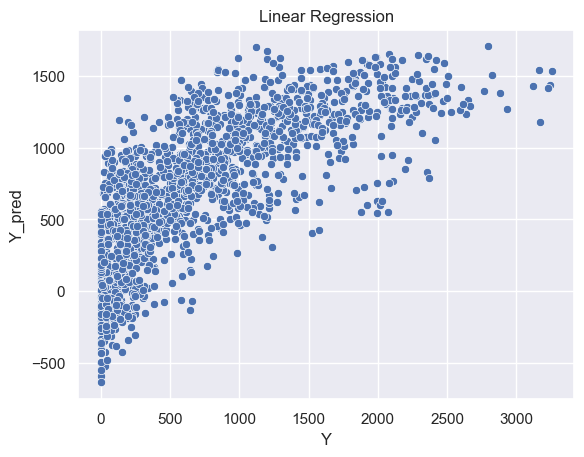

In [83]:
sns.scatterplot(y_test,y_test_LR)
plt.xlabel("Y")
plt.ylabel("Y_pred")
plt.title("Linear Regression")
plt.show()


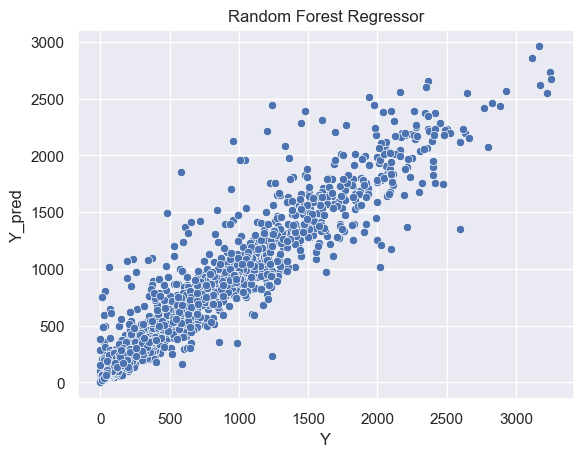

In [84]:
sns.scatterplot(y_test,rf_y_pred)
plt.xlabel("Y")
plt.ylabel("Y_pred")
plt.title("Random Forest Regressor")
plt.show()

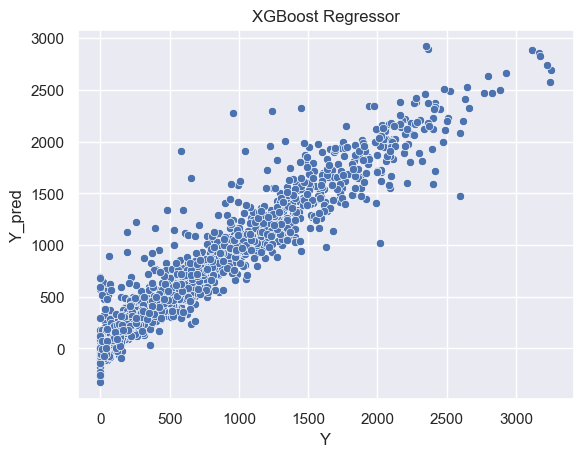

In [85]:
sns.scatterplot(y_test,xgb_y_pred_test)
plt.xlabel("Y")
plt.ylabel("Y_pred")
plt.title("XGBoost Regressor")
plt.show()

# Cross Validation for Random Forest

In [86]:
np.linspace(20,120,num = 12)

array([ 20.        ,  29.09090909,  38.18181818,  47.27272727,
        56.36363636,  65.45454545,  74.54545455,  83.63636364,
        92.72727273, 101.81818182, 110.90909091, 120.        ])

In [87]:
from sklearn.model_selection import RandomizedSearchCV

#Number of trees 
n_estimators = [int(x) for x in np.linspace(start = 200,stop=2000,num=10)]

# Numbers of features to consider at every split
max_features=["auto","sqrt"]

# Maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(20,120,num = 12)]

# min number of samples required to split a node

min_samples_split=[2,6,10]

# Min number of samples required at each leaf node
min_samples_leaf = [1,2,4,]

# Method of selecting samples for traininng each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {"n_estimators":n_estimators,
              "max_features":max_features,
            "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "bootstrap":bootstrap}

In [88]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [20, 29, 38, 47, 56, 65, 74, 83, 92, 101, 110, 120],
 'min_samples_split': [2, 6, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [89]:
# rf = RandomForestRegressor()
# # Randomly searches the parameters using 3 fold cross validation.
# # search accross 100 of different combinations

# rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100, cv = 3,verbose =2, random_state =42, n_jobs= -1 )
# rf_random.fit(x_train_scaled,y_train)
# y_pred_rf_cv = rf_random.predict(x_test_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [90]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [91]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 101,
 'bootstrap': True}

In [94]:
rf_tuned = RandomForestRegressor(n_estimators=800,
                                 min_samples_split =2,
                                 min_samples_leaf= 1,
                                 max_features = "auto",
                                 max_depth = 101,
                                 bootstrap = True)

rf_tuned.fit(x_train_scaled,y_train)
y_pred_tuned_rf = rf_tuned.predict(x_test_scaled)
get_metrics(y_test, y_pred_tuned_rf,"Random ForestCV")

Random ForestCV:['MSE':39922.405,'RMSE':199.806,'MAE':119.605,'R2_score':0.902]


# Hyperparameter for XG Boost

In [106]:
import time
start_time=time.time()

params ={"max_depth":[3,5,6,10,15,20],
        "learning_rate":[0.01,0.1,0.2,0.3],
        'subsample':np.arange(0.5,1.0,0.1),

        "n_estimators":[100,500,1000]}

xgbr = XGBRegressor(seed = 20)
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring = "neg_mean_squared_error",
                         n_iter = 25,
                         cv=5,
                         verbose=1)

    rscv.fit(x_train_scaled,y_train)
    y_pred_tuned_xgb= rscv.predict(x_test_scaled)

get_metrics(y_test, y_pred_tuned_xgb,"Random ForestCV")

print("time taken :",time.time()-start_time)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
Random ForestCV:['MSE':31218.155,'RMSE':176.687,'MAE':109.122,'R2_score':0.924]
time taken : 569.2086317539215


In [107]:
# RF trains model in paralled
# xgboost train in sequential order

In [109]:
print("Best Parameters:",rscv.best_params_)

Best Parameters: {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.6}


In [105]:
xgbr = XGBRegressor(subsample = 0.7,
                    n_estimators = 1000, 
                    max_depth = 20, 
                    learning_rate =0.01, 
                    colsample_bytree =0.9, 
                    colsample_bylevel = 0.5,
                    seed = 20)

xgbr.fit(x_train_scaled,y_train)
y_pred_tuned = xgbr.predict(x_test_scaled)
get_metrics(y_test, y_pred_tuned,"XGboost Tuned")

XGboost Tuned:['MSE':29013.482,'RMSE':170.333,'MAE':100.49,'R2_score':0.929]


In [129]:
xgbr = XGBRegressor(subsample = 0.7,
                    n_estimators = 2000, 
                    max_depth = 14, 
                    learning_rate =0.01, 
                    colsample_bytree =0.9, 
                    colsample_bylevel = 0.7,
                    seed = 20)

xgbr.fit(x_train_scaled,y_train)
y_pred_tuned = xgbr.predict(x_test_scaled)
get_metrics(y_test, y_pred_tuned,"XGboost Tuned")

XGboost Tuned:['MSE':27577.939,'RMSE':166.066,'MAE':96.953,'R2_score':0.932]


In [ ]:
# XGboost regressor is providing with best R2score of 93.2 with the MAE of 96.95